In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
import random
import matplotlib
from cycler import cycler

In [117]:
params = {
        "image.cmap": "tab20c",
        "font.size": 16,
        "font.family": "Arial",
        "axes.titlesize": 18,
        "axes.labelsize": 14,
        "xtick.labelsize": 14,
        "ytick.labelsize": 14,
        "legend.fontsize": 14,
        "legend.title_fontsize": 16,
        "figure.figsize": (8, 8),
        "axes.xmargin": 0.1,
        "axes.ymargin": 0.04}
plt.rcParams.update(params)

In [ ]:
plt.rcParams["axes.prop_cycle"]

In [ ]:
# get cycler from Set3 palette
from pylab import *
cmap = cm.get_cmap('Set3')    # PiYG
cycler_colors = []
for i in range(cmap.N):
    rgba = cmap(i)
    # rgb2hex accepts rgb or rgba
    cycler_colors.append(matplotlib.colors.rgb2hex(rgba))

In [132]:
?cycler

In [2]:
path = "/Users/kang/Dropbox/Code/data/toppcell_test/"

In [74]:
df_bin = pd.read_csv(path + "test_bin_table.txt", sep = "\t", header = 0, index_col = 0).T
df_bin_meta = pd.read_csv(path + "test_bin_meta_table.txt", sep = "\t", header = 0, index_col = 0)
df_DEG = pd.read_csv(path + "DEGs_cell.txt", sep = "\t", header = 0, index_col = 0)

In [53]:
df_bin.shape

(35635, 209)

In [54]:
df_DEG.shape

(285080, 7)

In [55]:
df_bin.head()

,ctrl-B cells-bin-0,ctrl-B cells-bin-1,ctrl-B cells-bin-10,ctrl-B cells-bin-11,ctrl-B cells-bin-12,ctrl-B cells-bin-13,ctrl-B cells-bin-2,ctrl-B cells-bin-3,ctrl-B cells-bin-4,ctrl-B cells-bin-5,...,stim-NK cells-bin-11,stim-NK cells-bin-12,stim-NK cells-bin-2,stim-NK cells-bin-3,stim-NK cells-bin-4,stim-NK cells-bin-5,stim-NK cells-bin-6,stim-NK cells-bin-7,stim-NK cells-bin-8,stim-NK cells-bin-9
MIR1302-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FAM138A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
OR4F5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
RP11-34P13.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
RP11-34P13.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
df_DEG.head()

,Status,scores,logfoldchanges,pvals,pvals_adj,pts,pts_rest
names,,,,,,,
CD74,B cells,151.864487,7.343440,0.0,0.0,0.990284,0.526109
HLA-DRA,B cells,130.348312,7.762211,0.0,0.0,0.971240,0.368371
HLA-DRB1,B cells,76.798622,6.471466,0.0,0.0,0.881461,0.337828
CD79A,B cells,73.298073,10.871271,0.0,0.0,0.690245,0.012670
HLA-DPA1,B cells,62.462658,5.916356,0.0,0.0,0.806840,0.295339


In [57]:
np.unique(df_DEG["Status"])

array(['B cells', 'CD14+ Monocytes', 'CD4 T cells', 'CD8 T cells',
       'Dendritic cells', 'FCGR3A+ Monocytes', 'Megakaryocytes',
       'NK cells'], dtype=object)

In [58]:
df_subsetDEG = df_DEG.groupby(["Status"]).head(200)
df_subsetDEG = df_subsetDEG.sort_values(["Status", "pts"], ascending = [True, False])
df_subsetDEG.head()

,Status,scores,logfoldchanges,pvals,pvals_adj,pts,pts_rest
names,,,,,,,
MALAT1,B cells,16.935381,0.253655,1.905770e-62,1.221441e-60,0.999223,0.997873
RPS2,B cells,41.362907,0.915839,0.000000e+00,0.000000e+00,0.998834,0.979231
RPL13,B cells,44.911869,1.014175,0.000000e+00,0.000000e+00,0.998445,0.975973
RPS19,B cells,45.142956,1.049590,0.000000e+00,0.000000e+00,0.998057,0.971765
RPL13A,B cells,47.070755,1.153605,0.000000e+00,0.000000e+00,0.997668,0.970317


In [76]:
# reorder df_bin
df_bin_meta = df_bin_meta.sort_values(["cell", "stim"])
df_bin = df_bin.loc[:, list(df_bin_meta.index.values)]

In [77]:
df_heatmap.to_csv(path + "heatmap.txt", sep = "\t")
df_heatmap.head()

,ctrl-B cells-bin-0,ctrl-B cells-bin-1,ctrl-B cells-bin-2,ctrl-B cells-bin-3,ctrl-B cells-bin-4,ctrl-B cells-bin-5,ctrl-B cells-bin-6,ctrl-B cells-bin-7,ctrl-B cells-bin-8,ctrl-B cells-bin-9,...,stim-NK cells-bin-3,stim-NK cells-bin-4,stim-NK cells-bin-5,stim-NK cells-bin-6,stim-NK cells-bin-7,stim-NK cells-bin-8,stim-NK cells-bin-9,stim-NK cells-bin-10,stim-NK cells-bin-11,stim-NK cells-bin-12
MALAT1,15.434958,15.744554,15.907294,16.021366,16.102377,16.054108,16.076878,16.105022,16.147181,16.265970,...,16.161806,16.232668,16.200256,16.262424,16.287071,16.352869,16.331924,16.408272,16.428579,16.431232
RPS2,13.229801,13.360685,13.514139,13.575963,13.568206,13.446855,13.594203,13.540476,13.461397,13.460825,...,11.578118,11.449128,11.849529,10.920788,11.454806,10.768597,10.706498,11.431891,11.318838,10.668846
RPL13,12.910189,13.152624,13.340174,13.385347,13.391960,13.408374,13.446860,13.337586,13.349913,13.441875,...,11.283188,11.698208,11.298018,11.584160,11.320724,11.378019,11.133749,11.581010,10.621077,10.456909
RPS19,12.717336,12.775962,12.818413,13.057341,13.170571,13.042192,13.217729,13.142006,13.167576,13.188867,...,11.802504,11.791945,11.571882,11.364098,11.448328,11.575607,11.882621,11.519570,11.160199,10.982304
RPL13A,12.906629,12.982512,13.328936,13.260606,13.397074,13.296496,13.445388,13.425272,13.187662,13.381186,...,10.999023,10.905376,11.019019,11.362285,11.071683,10.821525,11.151191,10.780089,10.393428,10.160810


Text(50.0, 0.5, 'gene modules')

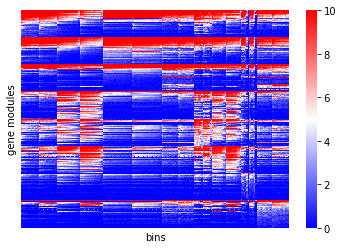

In [117]:
fig, ax = plt.subplots()
sns.heatmap(df_heatmap, vmin = 0, vmax = 10, yticklabels=False, xticklabels=False, cmap = "bwr", ax = ax)
ax.set_xlabel("bins")
ax.set_ylabel("gene modules")

#### load shred output

In [95]:
path = "/Users/kang/Dropbox/Code/data/toppcell_test/"
#df_heatmap = pd.read_csv(path + "heatmap_matrix.txt", sep = "\t", header = 0, index_col = 0)
df_bin_meta = pd.read_csv(path + "bin_metadata.txt", sep = "\t", header = 0, index_col = 0)
#df_deg_module = pd.read_csv(path + "deg_shredplan.txt", sep = "\t", header = 0, index_col = 0)

In [7]:
df_heatmap.shape

(5200, 994)

Text(50.0, 0.5, 'gene modules')

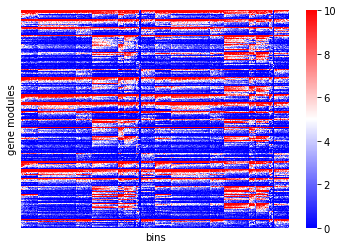

In [5]:
fig, ax = plt.subplots()
sns.heatmap(df_heatmap, vmin = 0, vmax = 10, yticklabels=False, xticklabels=False, cmap = "bwr", ax = ax)
ax.set_xlabel("bins")
ax.set_ylabel("gene modules")

In [6]:
df_heatmap.head()

,ctrl-B cells-bin-0,ctrl-B cells-bin-1,ctrl-B cells-bin-2,ctrl-B cells-bin-3,ctrl-B cells-bin-4,ctrl-B cells-bin-5,ctrl-B cells-bin-6,ctrl-B cells-bin-7,ctrl-B cells-bin-8,ctrl-B cells-bin-9,...,stim-NK cells-bin-47,stim-NK cells-bin-48,stim-NK cells-bin-49,stim-NK cells-bin-50,stim-NK cells-bin-51,stim-NK cells-bin-52,stim-NK cells-bin-53,stim-NK cells-bin-54,stim-NK cells-bin-55,stim-NK cells-bin-56
names,,,,,,,,,,,,,,,,,,,,,
MALAT1,15.243845,15.549600,15.177372,15.494718,15.924224,15.630989,15.555499,15.819240,15.892920,15.771133,...,16.378929,16.476194,16.274712,16.394564,16.552271,16.522205,16.599457,16.250437,16.583708,16.230389
RPS2,13.057251,13.318465,13.357325,13.133443,13.238771,13.276686,13.297025,13.489362,13.520915,13.562415,...,11.492401,10.655921,11.276680,12.259584,11.169847,10.884022,10.183993,9.962560,12.455915,10.124945
RPL13,12.819453,12.960135,12.871999,12.918115,12.992831,13.077511,13.262815,13.152974,13.193178,13.470922,...,11.852070,10.963547,11.385922,10.681435,10.813249,10.015643,10.098602,10.284519,10.245908,10.387077
RPS19,12.536042,12.744226,12.822029,12.725644,12.749463,12.830173,12.717999,12.889393,12.718104,12.961156,...,11.953522,11.206493,9.688806,11.882328,11.842828,10.990659,11.533920,10.671994,11.403638,10.563638
RPL13A,12.743039,12.982906,13.051197,12.902918,12.800907,13.062754,12.953205,12.994350,13.032144,13.371136,...,10.939131,9.692326,11.210670,10.658924,9.366014,11.153981,10.593846,9.505539,11.366567,8.968153


In [4]:
counts = np.random.normal(100,20,994)
counts

array([ 92.66282358, 110.89348103, 121.55385042,  71.76070729,
        78.2109885 , 150.66343461,  98.53739181, 107.65528827,
        89.43549605,  92.22914125,  80.85310803,  96.97894314,
        66.42377869, 111.99458758,  91.37715492,  84.11147726,
       135.18949563,  72.04333702, 100.93417623,  74.18659074,
        68.83425385, 116.80638132,  56.77887577, 110.5309622 ,
       109.07792792, 132.78127557,  77.88016273, 101.05031923,
        77.03609181,  50.76102089, 124.00918602,  95.06429114,
        80.30189301,  86.7775839 , 113.66895558, 114.85009252,
       117.35028245, 113.03589447, 101.59023166, 106.82401943,
        90.21548486,  57.48727045,  76.0497622 , 111.23321274,
       112.42042232, 124.34717068, 104.36533105,  75.03386764,
       110.18375578,  78.08257613,  99.3367718 ,  91.22127559,
        88.27478767, 105.09609421, 108.3021683 ,  82.06559185,
       124.90632682, 148.80121941, 121.77489006, 109.49702632,
        88.54609035,  86.66705078,  87.34932416,  34.40

<BarContainer object of 994 artists>

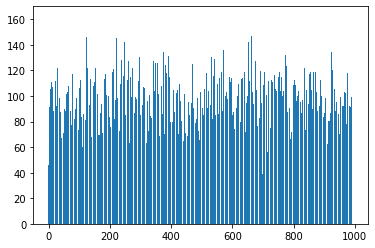

In [21]:
fig, ax = plt.subplots()
ax.bar(x = list(range(994)), height = counts)

In [15]:
df_subsetDEG = df_deg_module.groupby(["Status"]).head(200)
df_subsetDEG = df_subsetDEG.sort_values(["shred_plan", "reference_group", "Status", "pts"], ascending = [True, True, True, False])

In [16]:
df_subsetDEG.shape

(5200, 9)

In [13]:
np.unique(df_deg_module["Status"])

array(['B cells', 'CD14+ Monocytes', 'CD4 T cells', 'CD8 T cells',
       'Dendritic cells', 'FCGR3A+ Monocytes', 'Megakaryocytes',
       'NK cells', 'ctrl', 'ctrl-B cells', 'ctrl-CD14+ Monocytes',
       'ctrl-CD4 T cells', 'ctrl-CD8 T cells', 'ctrl-Dendritic cells',
       'ctrl-FCGR3A+ Monocytes', 'ctrl-Megakaryocytes', 'ctrl-NK cells',
       'stim', 'stim-B cells', 'stim-CD14+ Monocytes', 'stim-CD4 T cells',
       'stim-CD8 T cells', 'stim-Dendritic cells',
       'stim-FCGR3A+ Monocytes', 'stim-Megakaryocytes', 'stim-NK cells'],
      dtype=object)

In [29]:
?sns.heatmap

In [27]:
df_subsetDEG.head()

,Status,scores,logfoldchanges,pvals,pvals_adj,pts,pts_rest,reference_group,shred_plan
names,,,,,,,,,
MALAT1,B cells,9.979366,0.253655,1.876610e-23,2.214338e-21,0.999223,0.997873,,cell
RPS2,B cells,27.001722,0.915839,1.410661e-160,1.092802e-157,0.998834,0.979231,,cell
RPL13,B cells,25.935946,1.014175,2.619755e-148,1.761415e-145,0.998445,0.975973,,cell
RPS19,B cells,30.336769,1.049590,3.755347e-202,3.935936e-199,0.998057,0.971765,,cell
RPL13A,B cells,31.270924,1.153605,1.159941e-214,1.425328e-211,0.997668,0.970317,,cell


In [28]:
df_subsetDEG["reference_group"] = df_subsetDEG["reference_group"].fillna("")
df_subsetDEG["shred_plan"] = df_subsetDEG["shred_plan"].fillna("")

In [32]:
?ax.bar

In [114]:
plt.get_cmap("tab20c")

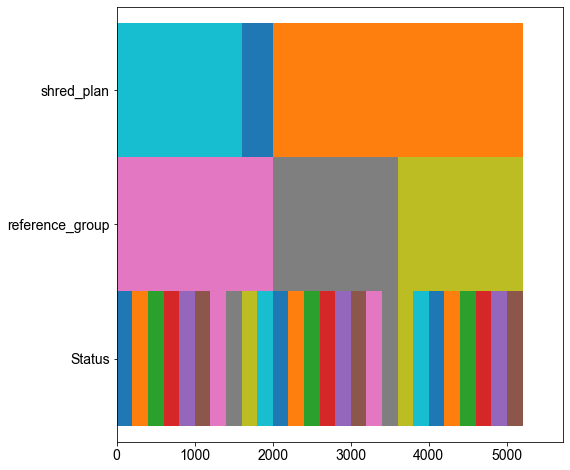

In [118]:
fig, ax = plt.subplots()
columns = ["Status", "reference_group","shred_plan"]

for column in columns:
    count_aggregrated = 0
    labels = np.unique(df_subsetDEG[column])
    label_counts = dict(df_subsetDEG[column].value_counts())
    for label in labels:
        count = label_counts[label]
        ax.barh(y = column, width = count, height = 1, left = count_aggregrated)
        count_aggregrated += count
plt.show()

In [96]:
df_bin_meta.head(10)

,stim,cell
bin_id,,
stim-B cells-bin-0,stim,B cells
stim-CD8 T cells-bin-0,stim,CD8 T cells
ctrl-B cells-bin-0,ctrl,B cells
ctrl-CD14+ Monocytes-bin-0,ctrl,CD14+ Monocytes
ctrl-Megakaryocytes-bin-0,ctrl,Megakaryocytes
stim-FCGR3A+ Monocytes-bin-0,stim,FCGR3A+ Monocytes
stim-Dendritic cells-bin-0,stim,Dendritic cells
ctrl-CD8 T cells-bin-0,ctrl,CD8 T cells
stim-CD14+ Monocytes-bin-0,stim,CD14+ Monocytes


In [98]:
df_bin_meta = df_bin_meta.loc[df_heatmap.columns, : ]
df_bin_meta.head()

,stim,cell
ctrl-B cells-bin-0,ctrl,B cells
ctrl-B cells-bin-1,ctrl,B cells
ctrl-B cells-bin-2,ctrl,B cells
ctrl-B cells-bin-3,ctrl,B cells
ctrl-B cells-bin-4,ctrl,B cells


In [99]:
df_bin_meta.head()

,stim,cell
ctrl-B cells-bin-0,ctrl,B cells
ctrl-B cells-bin-1,ctrl,B cells
ctrl-B cells-bin-2,ctrl,B cells
ctrl-B cells-bin-3,ctrl,B cells
ctrl-B cells-bin-4,ctrl,B cells


In [105]:
df_deg_module.head()

,Status,scores,logfoldchanges,pvals,pvals_adj,pts,pts_rest,reference_group,shred_plan
names,,,,,,,,,
RPL6,ctrl,43.413876,2.129282,0.000000e+00,0.000000e+00,0.905562,0.745428,NaN,stim
EEF1A1,ctrl,37.804348,1.772994,0.000000e+00,0.000000e+00,0.793991,0.657873,NaN,stim
RPL7,ctrl,37.529282,1.396236,3.068095e-308,1.792321e-305,0.979294,0.906538,NaN,stim
RPL10,ctrl,36.378002,0.787949,9.484464e-290,5.199675e-287,0.988063,0.970869,NaN,stim
PFN1,ctrl,36.365284,1.256690,1.506767e-289,8.135403e-287,0.816403,0.743810,NaN,stim


/Users/kang/miniconda3/envs/aipy/lib/python3.7/site-packages/ipykernel_launcher.py:48: UserWarning: FixedFormatter should only be used together with FixedLocator


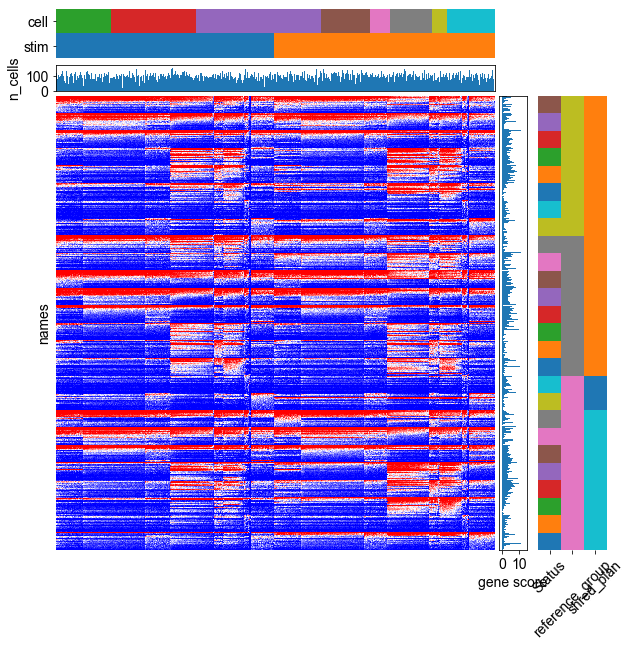

In [111]:
fig = plt.figure(figsize = (10,10))
gs = GridSpec(nrows = 3, ncols = 3, height_ratios=(0.10,0.05, 0.85), width_ratios = (0.80,0.05,0.15))
gs.update(wspace = 0.025, hspace = 0.025)

# bin metadata barplot
ax3 = fig.add_subplot(gs[0,0])
columns = df_bin_meta.columns

for column in columns:
    count_aggregrated = 0
    labels = np.unique(df_bin_meta[column])
    label_counts = dict(df_bin_meta[column].value_counts())
    for label in labels:
        count = label_counts[label]
        ax3.barh(y = column, width = count, height = 1, left = count_aggregrated)
        ax3.set_xticklabels("")
        ax3.set_xticks([])
        count_aggregrated += count
# ax3.set_yticklabels(columns, rotation = 45)
ax3.set_xlim(0,994)
ax3.spines['left'].set_visible(False)
ax3.spines['right'].set_visible(False) 
ax3.spines['top'].set_visible(False) 
ax3.spines['bottom'].set_visible(False) 

# n_cell histograms
ax0 = fig.add_subplot(gs[1,0])
ax0.bar(x = list(range(994)), height = counts, width = 1)
ax0.set_xticklabels("")
ax0.set_xticks([])
ax0.set_xlim(0,994)
ax0.set_ylabel("n_cells")

# gene module barplots
ax1 = fig.add_subplot(gs[2,2])
columns = ["Status", "reference_group","shred_plan"]

for column in columns:
    count_aggregrated = 0
    labels = np.unique(df_subsetDEG[column])
    label_counts = dict(df_subsetDEG[column].value_counts())
    for label in labels:
        count = label_counts[label]
        ax1.bar(x = column, height = count, width = 1, bottom = count_aggregrated)
        ax1.set_yticklabels("")
        ax1.set_yticks([])
        count_aggregrated += count
ax1.set_xticklabels(columns, rotation = 45)
ax1.set_ylim(0,5200)
ax1.spines['left'].set_visible(False) 
ax1.spines['right'].set_visible(False) 
ax1.spines['top'].set_visible(False) 
ax1.spines['bottom'].set_visible(False) 

# gene module score histogram
ax4 = fig.add_subplot(gs[2,1])
ax4.barh(y = list(range(5200)), width = list(df_subsetDEG["logfoldchanges"]), height = 1)
ax4.set_yticklabels("")
ax4.set_yticks([])
ax4.set_ylim(0,5200)
ax4.set_xlabel("logFC")

# heatmap itself
ax2 = fig.add_subplot(gs[2,0])
sns.heatmap(df_heatmap, vmin = 0, vmax = 10, yticklabels=False, xticklabels=False, cmap = "bwr", ax = ax2, cbar = False)

fig.savefig(path + "heatmap.png")

### draw correlation heatmap

In [137]:
from scipy.stats import pearsonr

In [136]:
df_corr_bin = pd.DataFrame(index = df_heatmap.columns, columns = df_heatmap.columns)
df_corr_bin.head(2)

,ctrl-B cells-bin-0,ctrl-B cells-bin-1,ctrl-B cells-bin-2,ctrl-B cells-bin-3,ctrl-B cells-bin-4,ctrl-B cells-bin-5,ctrl-B cells-bin-6,ctrl-B cells-bin-7,ctrl-B cells-bin-8,ctrl-B cells-bin-9,...,stim-NK cells-bin-47,stim-NK cells-bin-48,stim-NK cells-bin-49,stim-NK cells-bin-50,stim-NK cells-bin-51,stim-NK cells-bin-52,stim-NK cells-bin-53,stim-NK cells-bin-54,stim-NK cells-bin-55,stim-NK cells-bin-56
ctrl-B cells-bin-0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ctrl-B cells-bin-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [148]:
for i in range(df_corr_bin.shape[1]):
    if i % 5 == 0:
        print(i)
    for j in range(i, df_corr_bin.shape[1]):
        corr = pearsonr(list(df_heatmap.iloc[:,i]), list(df_heatmap.iloc[:,j]))
        df_corr_bin.iloc[i,j] = corr; df_corr_bin.iloc[j,i] = corr

0
5


KeyboardInterrupt: 